In [16]:
from torchvision.transforms import Compose, ToTensor, Normalize

from utils import DatasetStatistics
from model import UNet
from dataset import SentinelNO2Dataset
from transforms import TargetNormalize

In [17]:
datastats = DatasetStatistics("../data/samples/samples_S2S5P_2018_2020_epa.csv", "../data/sentinel-2")

In [18]:
transform = Compose([ToTensor(), Normalize(datastats.band_means, datastats.band_std)])
target_transform = TargetNormalize(datastats.no2_mean, datastats.no2_std)

In [19]:
dataset = SentinelNO2Dataset(
    "../data/samples/samples_S2S5P_2018_2020_epa.csv",
    "../data/sentinel-2",
    transform=transform,
    target_transform=target_transform
)

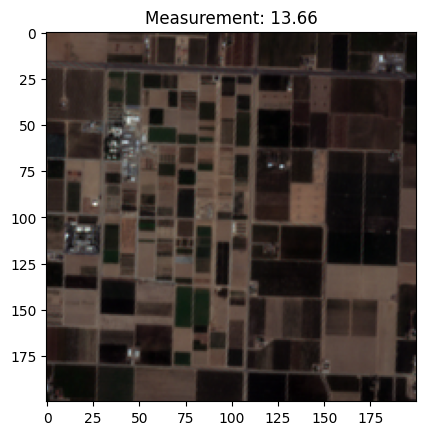

In [20]:
dataset.plot(0)

In [21]:
net = UNet()

In [22]:
dataset[0][0]

tensor([[[ 8.4271e-01,  8.2843e-01,  8.0463e-01,  ..., -9.3392e-01,
          -9.4344e-01, -9.2083e-01],
         [ 7.9749e-01,  7.8321e-01,  7.4989e-01,  ..., -5.2100e-01,
          -4.4008e-01, -5.4242e-01],
         [ 7.6655e-01,  7.4513e-01,  7.2609e-01,  ..., -1.0922e+00,
          -1.0267e+00, -9.1726e-01],
         ...,
         [-1.3123e+00, -8.8989e-01, -2.5921e-01,  ...,  7.1181e-01,
           5.2617e-01,  2.6676e-01],
         [-1.2790e+00, -1.0053e+00, -1.1879e-01,  ...,  2.2630e-01,
           2.4296e-01,  3.8576e-01],
         [-1.3064e+00, -1.1648e+00, -2.7825e-01,  ..., -7.1853e-01,
          -8.3277e-01, -7.1377e-01]],

        [[ 3.0195e-01,  2.9667e-01,  2.9931e-01,  ..., -8.2230e-01,
          -7.8663e-01, -8.2230e-01],
         [ 2.7289e-01,  2.9667e-01,  2.7289e-01,  ..., -5.3298e-01,
          -5.8847e-01, -4.3786e-01],
         [ 2.7289e-01,  3.0724e-01,  2.4382e-01,  ..., -8.6722e-01,
          -8.8572e-01, -8.8968e-01],
         ...,
         [-1.0007e+00, -7

In [7]:
outputs = net(dataset[0][0])

TypeError: img should be Tensor Image. Got <class 'numpy.float64'>

In [10]:
import numpy as np
output_np = np.moveaxis(outputs.detach().numpy(), 0, -1)

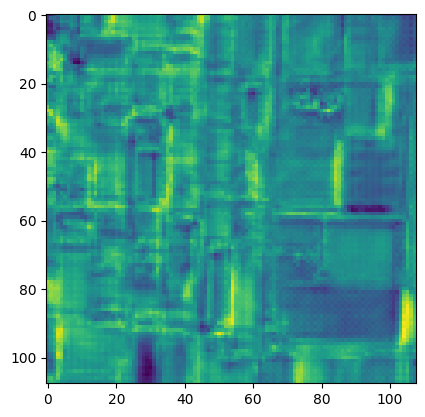

In [11]:
import matplotlib.pyplot as plt

plt.imshow(output_np)

In [11]:
output_np

array([[[-2.6115236 ],
        [ 1.3521069 ],
        [ 3.1418085 ],
        ...,
        [-3.514133  ],
        [-2.9007301 ],
        [-2.592852  ]],

       [[ 1.6645974 ],
        [ 5.671344  ],
        [ 6.9249487 ],
        ...,
        [-2.3421946 ],
        [-2.2358418 ],
        [-2.0827036 ]],

       [[ 0.8279122 ],
        [ 7.1140747 ],
        [ 6.6251183 ],
        ...,
        [-1.675543  ],
        [-2.0490174 ],
        [-2.0362277 ]],

       ...,

       [[-7.8061013 ],
        [-7.195893  ],
        [-1.9651834 ],
        ...,
        [ 0.2629813 ],
        [ 1.1647967 ],
        [ 1.760125  ]],

       [[-6.0104303 ],
        [-5.6869555 ],
        [-1.8109618 ],
        ...,
        [-0.77190983],
        [ 0.90984523],
        [ 1.7164325 ]],

       [[-0.89528286],
        [-0.627638  ],
        [ 1.682515  ],
        ...,
        [-0.48042595],
        [ 1.2953719 ],
        [ 1.7022313 ]]], dtype=float32)

In [18]:
outputs

tensor([[[80.3009, 80.6819, 77.8417,  ..., 38.7452, 40.8552, 41.1174],
         [78.6971, 75.5847, 72.8203,  ..., 36.8878, 39.2331, 39.6830],
         [77.2681, 73.3599, 70.2670,  ..., 35.7737, 38.2165, 40.1825],
         ...,
         [36.7345, 42.4103, 47.2496,  ..., 45.6052, 41.4255, 40.8900],
         [48.7299, 52.5638, 54.3908,  ..., 46.6183, 42.9276, 42.4842],
         [57.5026, 60.2631, 59.6491,  ..., 46.6697, 43.5403, 43.0592]]],
       grad_fn=<SqueezeBackward1>)